<a href="https://colab.research.google.com/github/elasa-Sites/scdl/blob/master/Souncloud_scraper2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install soundcloud-lib
from sclib import SoundcloudAPI, Track, Playlist

api = SoundcloudAPI()
playlist = api.resolve('https://soundcloud.com/razhavaniazha-com')

assert type(playlist) is Playlist

for track in playlist.tracks:
    filename = f'./{track.artist} - {track.title}.mp3'
    with open(filename, 'wb+') as fp:
        track.write_mp3_to(fp)

HTTPError: ignored

https://www.reddit.com/r/DataHoarder/comments/2zx21p/how_does_youtubedl_actually_enumerate_streams_to/

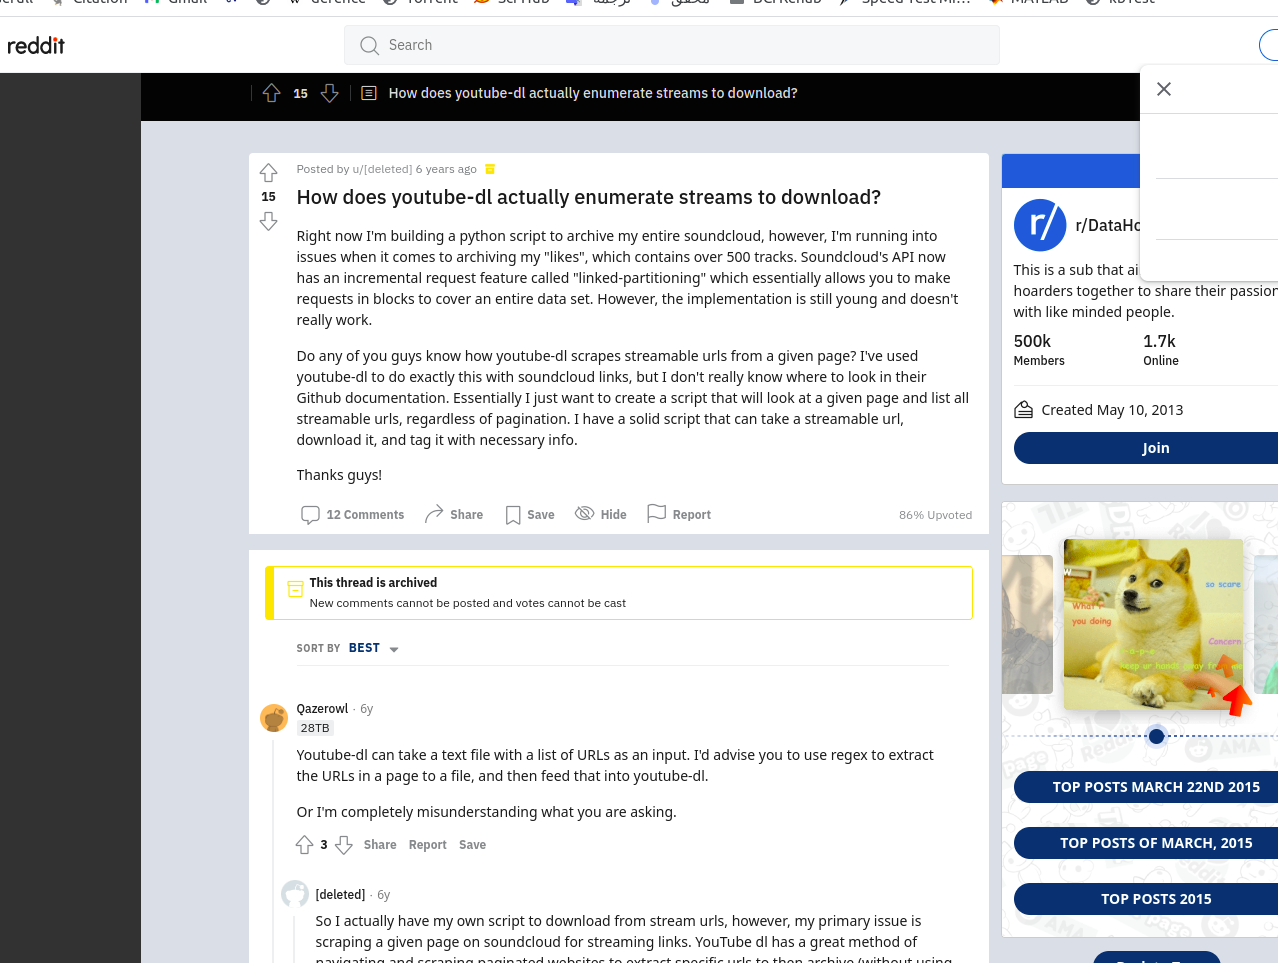

In [47]:
!pip install youtube-dl
!youtube-dl -v https://soundcloud.com/oneireuthslowbap/kantonamoiazei


[debug] System config: []
[debug] User config: []
[debug] Custom config: []
[debug] Command-line args: ['-v', 'https://soundcloud.com/oneireuthslowbap/kantonamoiazei']
[debug] Encodings: locale UTF-8, fs utf-8, out UTF-8, pref UTF-8
[debug] youtube-dl version 2021.06.06
[debug] Python version 3.7.10 (CPython) - Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
[debug] exe versions: ffmpeg 3.4.8, ffprobe 3.4.8
[debug] Proxy map: {}
[soundcloud] oneireuthslowbap/kantonamoiazei: Downloading info JSON
[soundcloud] 544978293: Downloading JSON metadata
[soundcloud] 544978293: Downloading JSON metadata
[soundcloud] 544978293: Downloading JSON metadata
[debug] Default format spec: bestvideo+bestaudio/best
[debug] Invoking downloader on 'https://cf-media.sndcdn.com/CGyDcQJB4V3G.128.mp3?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiKjovL2NmLW1lZGlhLnNuZGNkbi5jb20vQ0d5RGNRSkI0VjNHLjEyOC5tcDMiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2MjYyMDg0OTJ9fX1dfQ__&Signature=LTdAWPjTy9nFK579B

In [48]:
!youtube-dl -g "https://soundcloud.com/username-goes-here/likes"

In [49]:
!youtube-dl  'https://soundcloud.com/razhavaniazha-com' -v

[debug] System config: []
[debug] User config: []
[debug] Custom config: []
[debug] Command-line args: ['https://soundcloud.com/razhavaniazha-com', '-v']
[debug] Encodings: locale UTF-8, fs utf-8, out UTF-8, pref UTF-8
[debug] youtube-dl version 2021.06.06
[debug] Python version 3.7.10 (CPython) - Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
[debug] exe versions: ffmpeg 3.4.8, ffprobe 3.4.8
[debug] Proxy map: {}
[soundcloud:user] razhavaniazha-com: Downloading user info
[soundcloud:user] 34408815: Downloading track page 1
[soundcloud:user] 34408815: Downloading track page 2
[soundcloud:user] 34408815: Downloading track page 3
[soundcloud:user] 34408815: Downloading track page 4
[soundcloud:user] 34408815: Downloading track page 5
[soundcloud:user] 34408815: Downloading track page 6
[soundcloud:user] 34408815: Downloading track page 7
[soundcloud:user] 34408815: Downloading track page 8
[soundcloud:user] 34408815: Downloading track page 9
[soundcloud:user] 34408815: Downloading track 

In [10]:
!pip install selenium
#Importing libraries
from selenium import webdriver 
import pandas as pd  
from selenium.webdriver.common.keys import Keys
import time


driver = webdriver.Chrome()



driver.get("https://soundcloud.com/razhavaniazha-com") 

driver.find_element_by_css_selector("#content > div > div.l-fluid-fixed > div.sc-border-light-right.l-main > div.l-content > div > div.chartsMain__filters > div:nth-child(3) > button").click()



dropdown = driver.find_elements_by_xpath("//section[2]//ul//*[@class = 'sc-link-dark sc-truncate g-block']")



genres = []
links = []
for i in dropdown:
    genre = i.text
    link = i.get_attribute('href')
    genres.append(genre)
    links.append(link)



link_data = pd.DataFrame({"Genre": genres, "Link":links})
link_data.head()


def scrap(link_df):
    
    
    df = pd.DataFrame(columns = ['song_title', 'rank', 'genre', 'artist', 'this_week_score', 'total_score'])
    
    for index, row in link_df.iterrows():
        genre = row.Genre
        link = row.Link
        
        driver.get(link) 
    
        time.sleep(5)
        elem = driver.find_element_by_tag_name("body")
        no_of_pagedowns = 8

        while no_of_pagedowns:
            elem.send_keys(Keys.PAGE_DOWN)
            time.sleep(1)
            no_of_pagedowns-=1
    
        #song title and artist name
        song_data_scrap = driver.find_elements_by_class_name("chartTrack__details")
    
        # song total play counts and this week play counts
        song_score_scrap = driver.find_elements_by_class_name("chartTrack__score")
    
        # creating empty lists for storing scraped data
        song_data = []
        song_score = []
    
    
        for i in song_data_scrap:
            song_data.append(i.text)
        
    
        for i in song_score_scrap:
            song_score.append(i.text)
    

        # song genre
        song_genre = [genre for i in range(50)]
    
        #song rank
        rank = list(range(1, 51))
    
        #artist name
        artist = [i.split('\n')[0] for i in song_data]
    
        #song title
        title = [i.split('\n')[1] for i in song_data]
    
        #this week score
        score_this_week = []
        for i in song_score:
            if len(i) < 5:
                score = 0
            else:
                score = i.split()[0]
            score_this_week.append(score)
    
        # total score
        total_score = []
        for i in song_score:
            if len(i) < 5:
                score = 0
            else:
                score = i.split()[3]
            total_score.append(score)
            
            
        
        temp_df = pd.DataFrame({"song_title": title, "rank":rank, "genre":genre, "artist": artist, "this_week_score": score_this_week, "total_score":total_score})
        df = df.append(temp_df, ignore_index=True)
        print('dataframe shape is ',df.shape)   
         
    return df


# calling the function and creating the final dataframe
data = scrap(link_data)


WebDriverException: ignored

In [11]:
!python3 -m pip show soundcloud-lib

Name: soundcloud-lib
Version: 0.5.4
Summary: Python Soundcloud API
Home-page: https://github.com/3jackdaws/soundcloud-lib
Author: Ian Murphy
Author-email: 3jackdaws@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: bs4, aiohttp, mutagen
Required-by: 


In [13]:
from sclib import SoundcloudAPI, Track, Playlist

api = SoundcloudAPI()  # never pass a Soundcloud client ID that did not come from this library 

track = api.resolve('https://soundcloud.com/razhavaniazha-com')

assert type(track) is Track

filename = f'./{track.artist} - {track.title}.mp3'

with open(filename, 'wb+') as fp:
    track.write_mp3_to(fp)

HTTPError: ignored